<a href="https://colab.research.google.com/github/MeetVasani2810/Student-performance-Analysis/blob/main/student_performance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Performance Analysis**
This notebook performs **Exploratory Data Analysis (EDA)** on a student academic performance dataset to identify factors affecting grades and visualize trends using Python, Pandas, Matplotlib, and Seaborn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
# Load the dataset
df = pd.read_csv('student-scores.csv')
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [3]:
# Dataset info
print('Dataset Information:')
print(df.info())

# Missing values
print('\nMissing Values:')
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score            

In [4]:
# Descriptive statistics
df.describe()

,id,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1000.500000,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,577.494589,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,1.000000,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,500.750000,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,1000.500000,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,1500.250000,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,2000.000000,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


In [5]:
# Feature engineering: Calculate average score across all subjects
score_columns = ['math_score','history_score','physics_score','chemistry_score','biology_score','english_score','geography_score']
df['average_score'] = df[score_columns].mean(axis=1)
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,average_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,82.000000
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,91.428571
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,86.428571
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86,78.714286
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76,74.428571


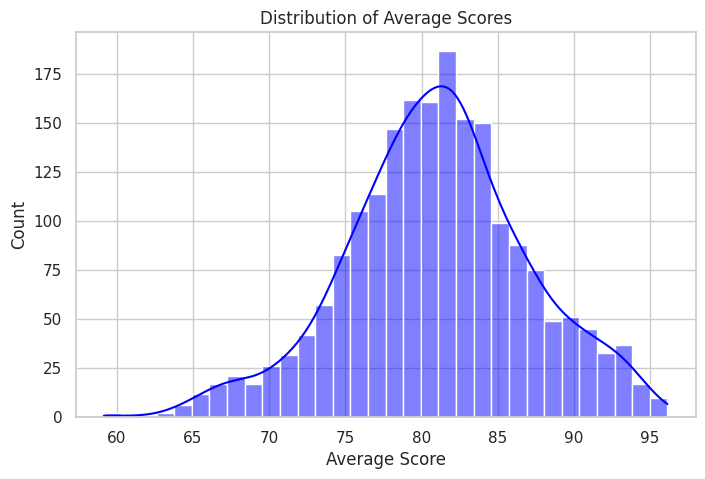

In [6]:
# Distribution of Average Scores
plt.figure(figsize=(8,5))
sns.histplot(df['average_score'], kde=True, color='blue')
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-793013433.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='average_score', data=df, palette='Set2')


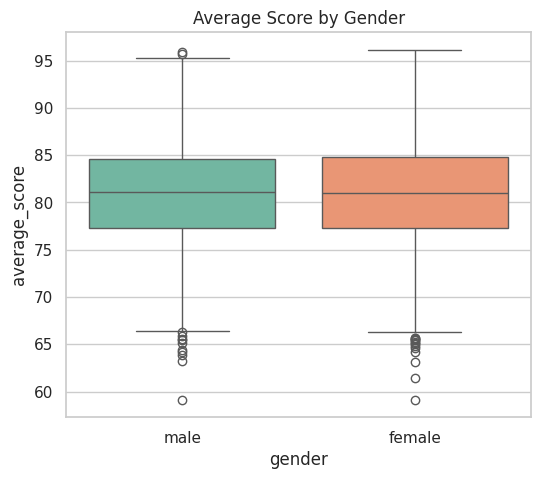

In [7]:
# Gender vs Average Score
plt.figure(figsize=(6,5))
sns.boxplot(x='gender', y='average_score', data=df, palette='Set2')
plt.title('Average Score by Gender')
plt.show()

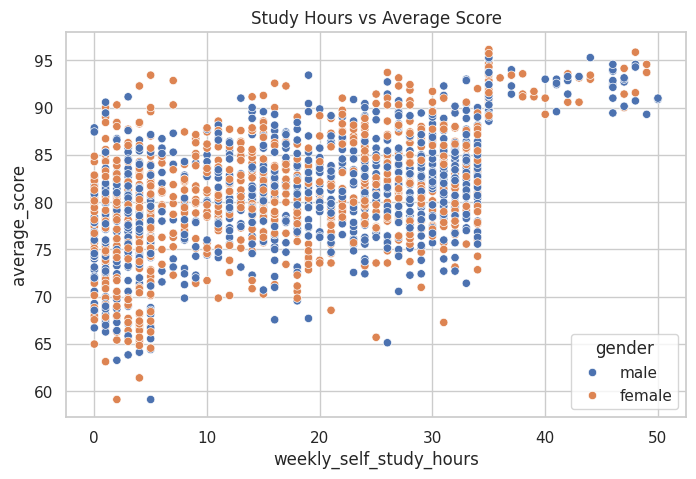

In [8]:
# Weekly Self Study Hours vs Average Score
plt.figure(figsize=(8,5))
sns.scatterplot(x='weekly_self_study_hours', y='average_score', data=df, hue='gender')
plt.title('Study Hours vs Average Score')
plt.show()

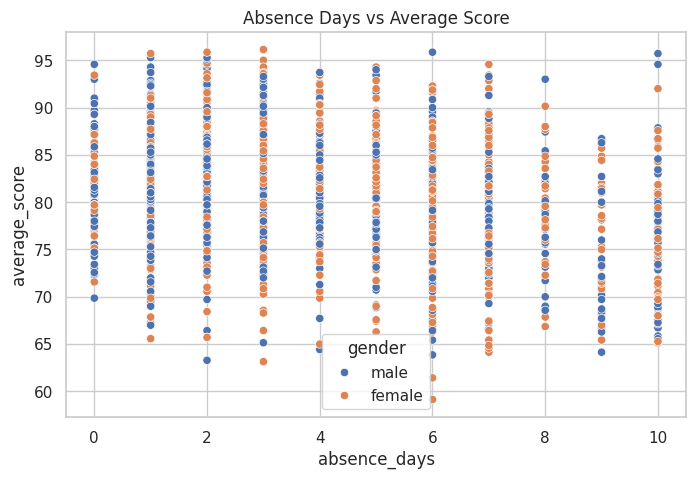

In [9]:
# Absence Days vs Average Score
plt.figure(figsize=(8,5))
sns.scatterplot(x='absence_days', y='average_score', data=df, hue='gender')
plt.title('Absence Days vs Average Score')
plt.show()

/tmp/ipython-input-3902751017.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='part_time_job', y='average_score', data=df, palette='coolwarm')


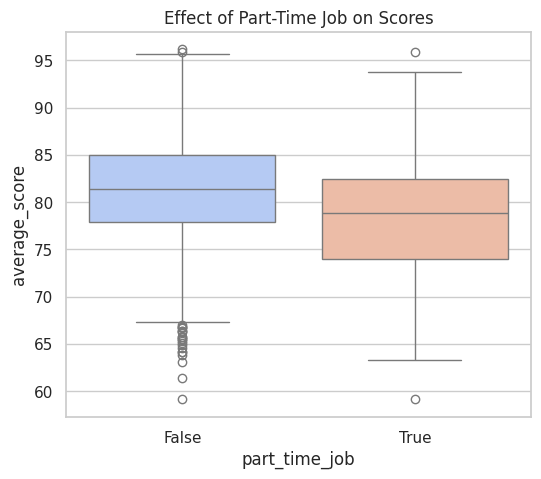

In [10]:
# Part-Time Job vs Average Score
plt.figure(figsize=(6,5))
sns.boxplot(x='part_time_job', y='average_score', data=df, palette='coolwarm')
plt.title('Effect of Part-Time Job on Scores')
plt.show()

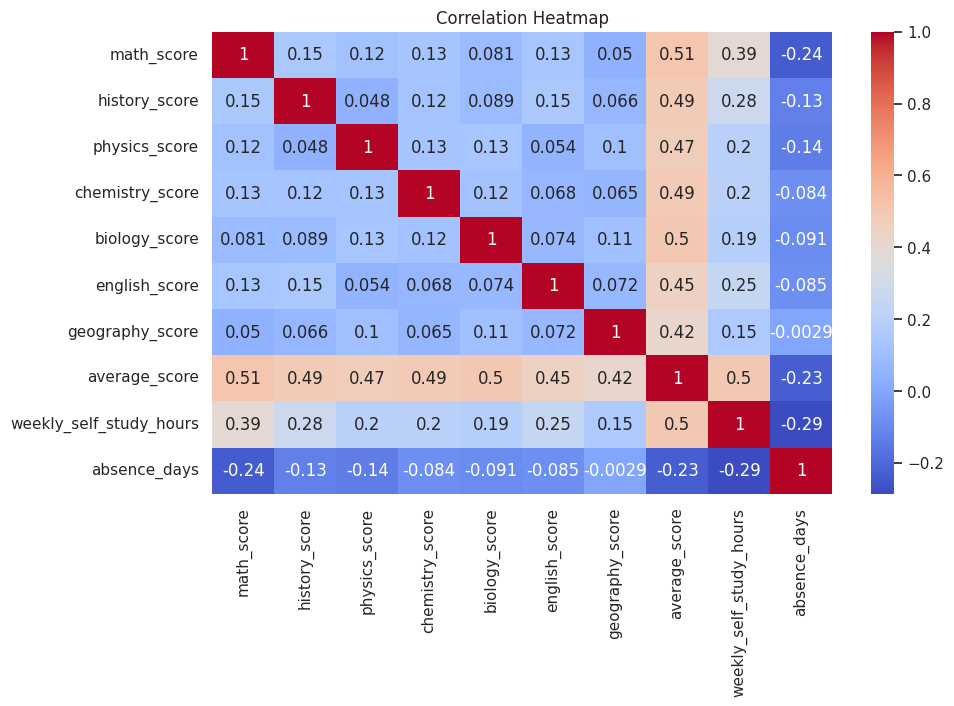

In [11]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
corr = df[score_columns + ['average_score', 'weekly_self_study_hours', 'absence_days']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### **Insights:**
1. Higher weekly self-study hours generally lead to higher scores.
2. More absence days correlate with lower average scores.
3. Gender differences are minimal but worth deeper analysis.
4. Part-time jobs seem to have a slight negative impact on average scores.